In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# degree 为数据集添加最多2次幂
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
# 三列：分别为X的0次方，X的1次方，X的2次方
X2[:5, :]

array([[1.        , 1.59768852, 2.55260862],
       [1.        , 1.8166015 , 3.30004101],
       [1.        , 1.34836386, 1.81808509],
       [1.        , 1.96454425, 3.85943411],
       [1.        , 0.30120318, 0.09072335]])

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

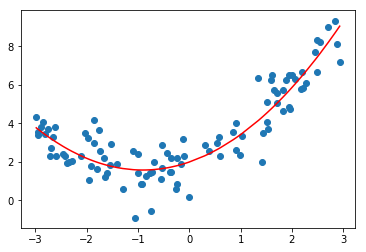

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

### PolynomialFeatures

In [10]:
X = np.arange(1, 11).reshape(-1, 2)

In [11]:
X.shape

(5, 2)

In [14]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2= poly.transform(X)

In [15]:
X2.shape

(5, 6)

$$ [x_0, x_1 , x_2, x_1^2, x_1 * x_2, x_2^2]  $$

In [16]:
# 对应的如上
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

$$\alpha$$

### Pipeline 将流程管道化

In [17]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('line_reg', LinearRegression())
])

In [20]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

In [21]:
y_predict.shape

(100,)